<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 4</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistente: Sebastián Calcagno y Braian Drago<p>
</div>

**Índices de precios internacionales de productos básicos en US$ por tonelada**

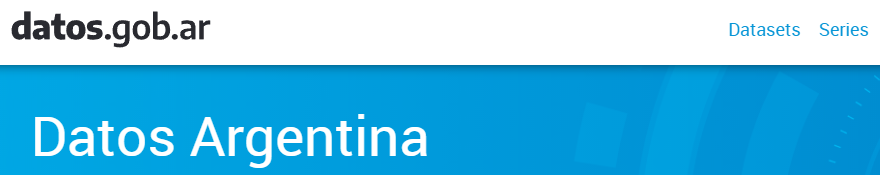

Modelo VAR

En un modelo VAR se trabajan con multiples series temporales.  
Un modelo VAR utiliza ecuaciones simultáneas para describir cómo cada variable depende de sus valores anteriores y de los valores anteriores de todas las demás variables en el modelo. Esto permite capturar las interacciones y relaciones dinámicas entre las variables.

Carga de librerías y funciones necesarias:

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as tsa
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

Carga de datos y transformaciones necesarias

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/indices-precios-internacionales-productos-basicos-mensual.csv'
serie = pd.read_csv(url, index_col='indice_tiempo', parse_dates=[0])
serie = serie.asfreq('MS')

In [ ]:
serie.head()

,trigo,maiz,arroz,cebada,poroto_soja,harina_soja
indice_tiempo,,,,,,
1980-01-01,175.634750,105.506813,395.0,66.584538,238.766037,201.756039
1980-02-01,172.695236,114.167831,399.0,66.584538,241.361320,198.261712
1980-03-01,163.509323,109.837318,415.0,69.897836,227.075780,186.103218
1980-04-01,156.528030,108.262604,419.0,69.897836,218.210476,181.197933
1980-05-01,161.304703,109.837318,433.0,68.241187,225.904457,187.392923


In [ ]:
serie.tail()

,trigo,maiz,arroz,cebada,poroto_soja,harina_soja
indice_tiempo,,,,,,
2017-02-01,147.3,162.9,368.5,136.2,380.9,371.4
2017-03-01,146.4,159.0,367.8,137.3,366.1,356.9
2017-04-01,138.4,156.4,374.5,138.8,347.9,342.6
2017-05-01,146.5,158.6,402.9,142.1,350.2,341.0
2017-06-01,157.2,158.0,444.7,140.8,339.7,330.4


**Haremos foco en Trigo, cebada y maíz:**

Visualizamos

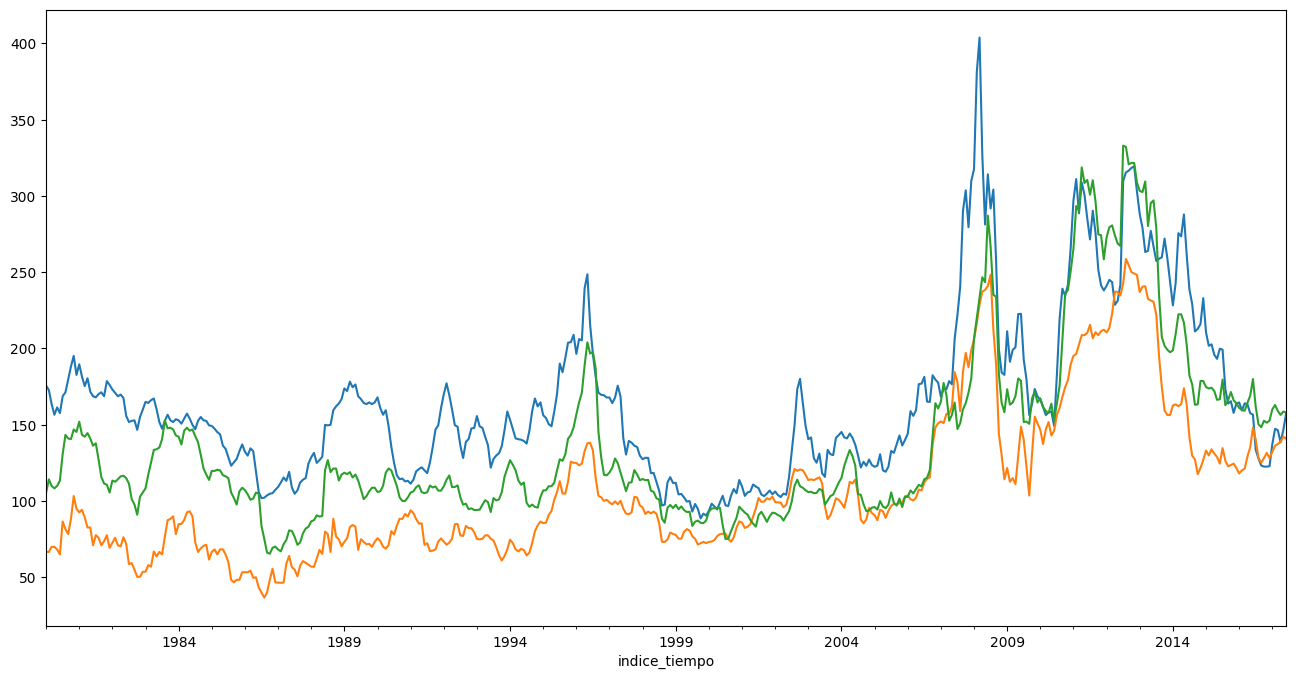

In [ ]:
serie.trigo.plot(figsize=(16,8));
serie.cebada.plot(figsize=(16,8));
serie.maiz.plot(figsize=(16,8));

In [ ]:
# Agrupa los datos por año y mes y calcula el promedio del precio del trigo para cada mes
precios_trigo_por_mes = serie['trigo'].groupby([serie.index.year, serie.index.month]).mean()

# Reorganiza los datos para tener los meses como índice y los años como columnas
precios_trigo_por_mes = precios_trigo_por_mes.unstack(level=0)

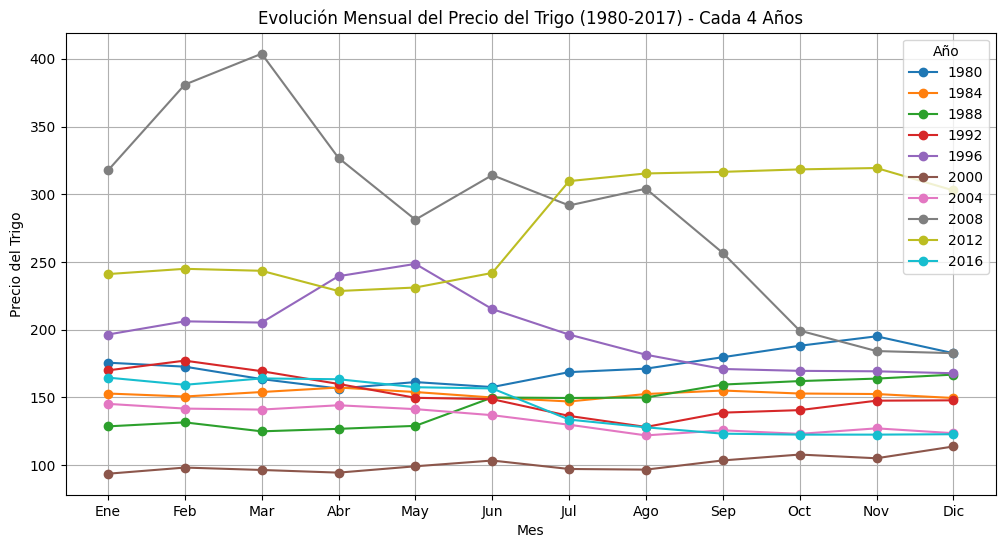

In [ ]:
# Filtra los datos para visualizar solo cada 5 años (puedes cambiar este valor)
intervalo_años = 4
precios_trigo_filtrados = precios_trigo_por_mes.iloc[:, ::intervalo_años]

# Graficar
plt.figure(figsize=(12, 6))
precios_trigo_filtrados.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Evolución Mensual del Precio del Trigo (1980-2017) - Cada {} Años'.format(intervalo_años))
plt.xlabel('Mes')
plt.ylabel('Precio del Trigo')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')
plt.grid(True)
plt.show()

# SEPARO VARIABLES A TRABAJAR

# ANALISIS DE ESTACIONARIEDAD

**Que observamos a continuación?**   
Decrecimiento rápido o lento de las autocorrelaciones??  
Se observa algún patron periódico evidente??       
Las autocorrelaciones se encuentran cerca de cero??  

Fuente = https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html <br>
Codigo= statsmodels.tsa.stattools.adfuller(serie.maiz, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

Variables para realizar los diferentes test de raices unitarias=

<ol>

<li>“c” : constant only (default)</li>

<li>“ct” : constant and trend</li>

<li>“ctt” : constant, and linear and quadratic trend</li>

<li>“nc” : no constant, no trend</li>

</ol>

Recordar: Si el valor p es igual o mayor que el nivel de significancia, no se rechaza la hipótesis nula, lo que sugiere que la serie es no estacionaria.

# Maiz

In [ ]:
maiz_ts=serie.drop(['trigo','arroz','cebada','poroto_soja','harina_soja'], axis=1)

In [ ]:
maiz_ts.head()

,maiz
indice_tiempo,
1980-01-01,105.506813
1980-02-01,114.167831
1980-03-01,109.837318
1980-04-01,108.262604
1980-05-01,109.837318


In [ ]:
print(pm.arima.ndiffs(maiz_ts))

1


In [ ]:
# Diferencio la serie
maiz_ts_diff=maiz_ts.copy()
maiz_ts_diff=maiz_ts_diff.diff(axis = 0, periods = 1)
maiz_ts_diff.drop(['1980-01-01'], inplace=True)

In [ ]:
print(pm.arima.ndiffs(maiz_ts_diff))

0


Primero analizamos serie original - MAIZ -

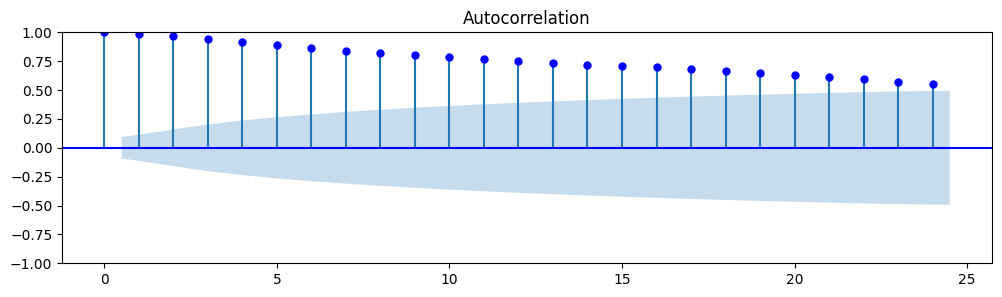

In [ ]:
acf_plot = plot_acf(maiz_ts, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(serie.maiz, regression='n',autolag='AIC')

(-0.700627302548721,
 0.41234587068932294,
 16,
 433,
 {'1%': -2.5709228555275243,
  '5%': -1.9416378864437647,
  '10%': -1.6162207681657739},
 3130.458609577689)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(serie.maiz, regression='c',autolag='AIC')

(-2.1500183335277887,
 0.2248830733867238,
 16,
 433,
 {'1%': -3.445542818501549,
  '5%': -2.868238133603207,
  '10%': -2.5703378690483176},
 3128.1145793319424)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(serie.maiz, regression='ct',autolag='AIC')

(-2.932371299544158,
 0.15197988628737646,
 16,
 433,
 {'1%': -3.9798311295958153,
  '5%': -3.420678245656216,
  '10%': -3.133042572822471},
 3126.1216090615862)

Ánalisis de la serie original diferenciada - MAIZ -

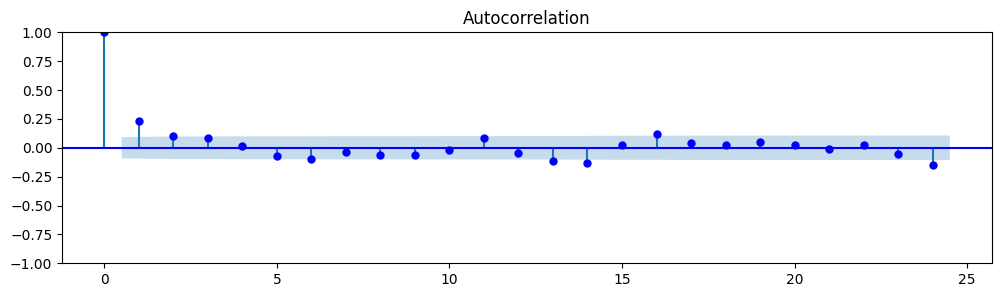

In [ ]:
acf_plot = plot_acf(maiz_ts_diff, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

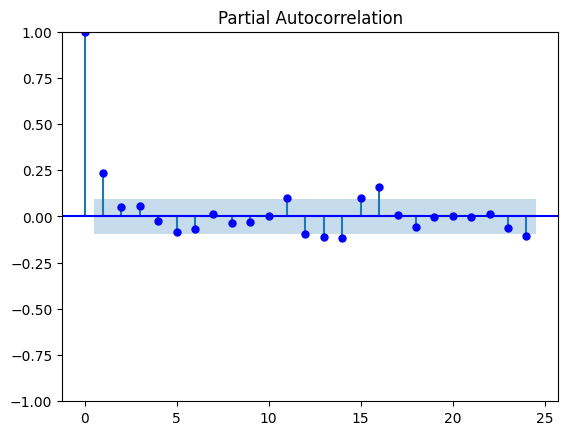

In [ ]:
plot_pacf(maiz_ts_diff, lags=24,  color= 'blue');

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(maiz_ts_diff.maiz, regression='n',autolag='AIC')

(-4.9822245006963355,
 1.1451336840197694e-06,
 15,
 433,
 {'1%': -2.5709228555275243,
  '5%': -1.9416378864437647,
  '10%': -1.6162207681657739},
 3122.0854272859406)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(maiz_ts_diff.maiz, regression='c',autolag='AIC')

(-4.976639635671169,
 2.4681049519257736e-05,
 15,
 433,
 {'1%': -3.445542818501549,
  '5%': -2.868238133603207,
  '10%': -2.5703378690483176},
 3124.066306519608)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(maiz_ts_diff.maiz, regression='ct',autolag='AIC')

(-4.974026169514543,
 0.0002293639191854352,
 15,
 433,
 {'1%': -3.9798311295958153,
  '5%': -3.420678245656216,
  '10%': -3.133042572822471},
 3126.057083546732)

# Serie Trigo

Primero analizamos serie original - TRIGO -

In [ ]:
trigo_ts=serie.drop(['cebada','arroz','maiz','poroto_soja','harina_soja'], axis=1)

In [ ]:
print(pm.arima.ndiffs(trigo_ts))

1


In [ ]:
# Diferencio la serie
trigo_ts_diff=trigo_ts.copy()
trigo_ts_diff=trigo_ts_diff.diff(axis = 0, periods = 1)
trigo_ts_diff.drop(['1980-01-01'], inplace=True)

In [ ]:
print(pm.arima.ndiffs(trigo_ts_diff))

0


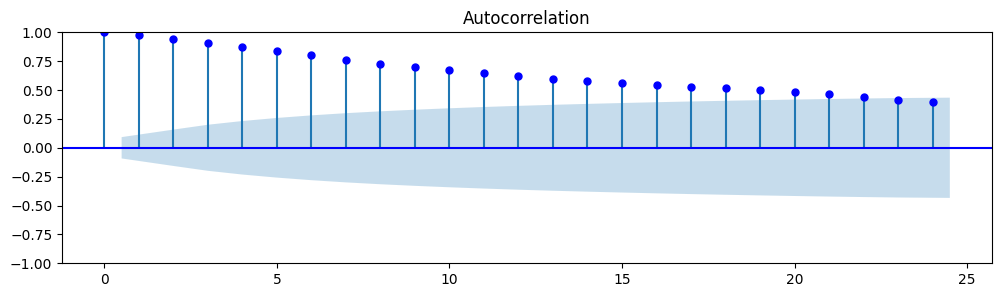

In [ ]:
acf_plot = plot_acf(trigo_ts, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(trigo_ts.trigo, regression='n',autolag='AIC')

(-0.8576260517662297,
 0.34641902329341384,
 8,
 441,
 {'1%': -2.5708284909065666,
  '5%': -1.9416260087080306,
  '10%': -1.616231391782543},
 3361.8032713653333)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(trigo_ts.trigo, regression='c',autolag='AIC')

(-2.5743823514904056,
 0.09840834221178346,
 8,
 441,
 {'1%': -3.4452655826028318,
  '5%': -2.868116205869215,
  '10%': -2.570272878944473},
 3357.9123884352484)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(trigo_ts.trigo, regression='ct',autolag='AIC')

(-2.9580081551660675,
 0.14420184515063617,
 8,
 441,
 {'1%': -3.979446309286507,
  '5%': -3.420492546721216,
  '10%': -3.132933481411034},
 3357.784083010919)

Ánalisis de la serie original diferenciada - TRIGO -

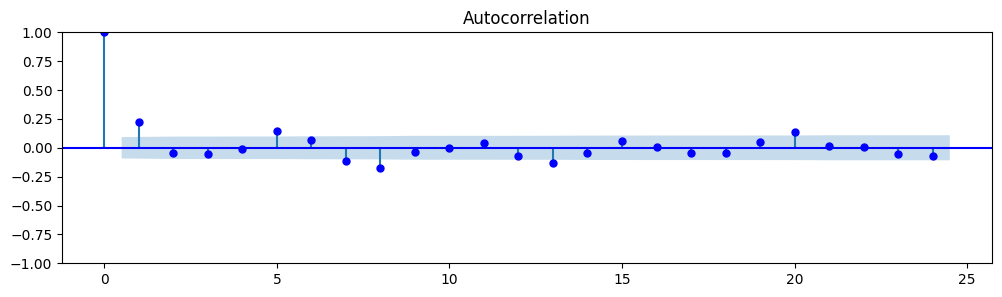

In [ ]:
acf_plot = plot_acf(trigo_ts_diff, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(trigo_ts_diff.trigo, regression='n',autolag='AIC')

(-8.354956120557224,
 5.0735942453695186e-14,
 7,
 441,
 {'1%': -2.5708284909065666,
  '5%': -1.9416260087080306,
  '10%': -1.616231391782543},
 3353.6737875815734)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(trigo_ts_diff.trigo, regression='c',autolag='AIC')

(-8.346129507545534,
 3.082001598646072e-13,
 7,
 441,
 {'1%': -3.4452655826028318,
  '5%': -2.868116205869215,
  '10%': -2.570272878944473},
 3355.668322500598)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(trigo_ts_diff.trigo, regression='ct',autolag='AIC')

(-8.333420555413669,
 1.2131363928091816e-11,
 7,
 441,
 {'1%': -3.979446309286507,
  '5%': -3.420492546721216,
  '10%': -3.132933481411034},
 3357.6679232346787)

# Serie cebada

In [ ]:
cebada_ts=serie.drop(['trigo','arroz','maiz','poroto_soja','harina_soja'], axis=1)

In [ ]:
cebada_ts.head()

,cebada
indice_tiempo,
1980-01-01,66.584538
1980-02-01,66.584538
1980-03-01,69.897836
1980-04-01,69.897836
1980-05-01,68.241187


In [ ]:
print(pm.arima.ndiffs(cebada_ts))

1


In [ ]:
# Diferencio la serie
cebada_ts_diff=cebada_ts.copy()
cebada_ts_diff=cebada_ts_diff.diff(axis = 0, periods = 1)
cebada_ts_diff.drop(['1980-01-01'], inplace=True)

In [ ]:
print(pm.arima.ndiffs(cebada_ts_diff))

0


Primero analizamos serie original - CEBADA -

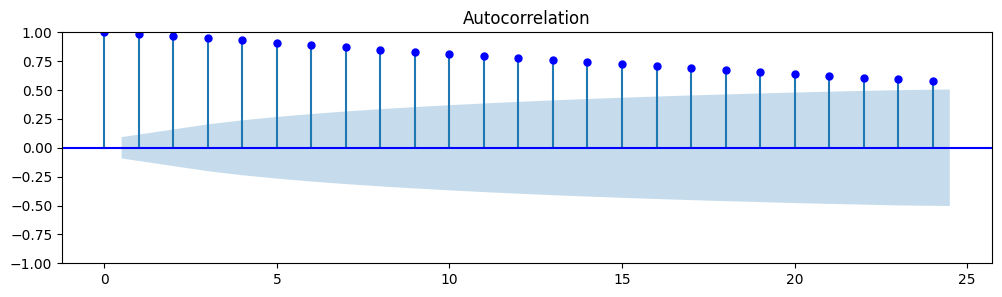

In [ ]:
acf_plot = plot_acf(cebada_ts, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(cebada_ts.cebada, regression='n',autolag='AIC')

(-0.5437923534785354,
 0.47804145229843087,
 1,
 448,
 {'1%': -2.5707486963887116,
  '5%': -1.941615972306499,
  '10%': -1.6162403831708814},
 2918.2053844443963)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(cebada_ts.cebada, regression='c',autolag='AIC')

(-2.1392501781073356,
 0.22902747988534805,
 1,
 448,
 {'1%': -3.4450311708077743,
  '5%': -2.8680131035505023,
  '10%': -2.570217924306441},
 2916.169247664343)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(cebada_ts.cebada, regression='ct',autolag='AIC')

(-3.1481286096219185,
 0.09524185611943131,
 1,
 448,
 {'1%': -3.9791209459359305,
  '5%': -3.420335526154187,
  '10%': -3.1328412336343927},
 2912.1236881710465)

Ánalisis de la serie original diferenciada - CEBADA -

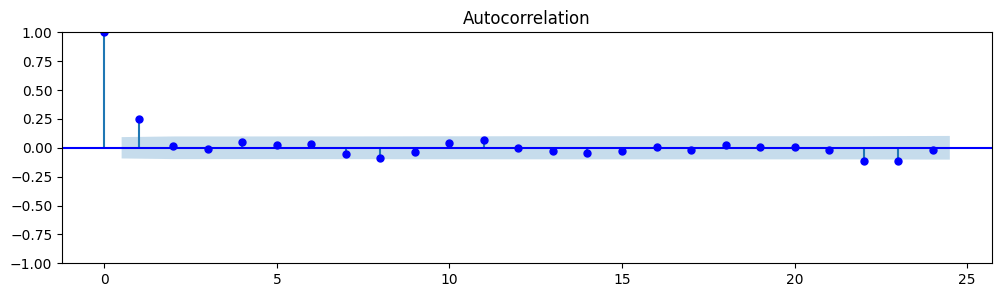

In [ ]:
acf_plot = plot_acf(cebada_ts_diff, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(cebada_ts_diff.cebada, regression='n',autolag='AIC')

(-16.366606421426578,
 4.644271755843037e-28,
 0,
 448,
 {'1%': -2.5707486963887116,
  '5%': -1.941615972306499,
  '10%': -1.6162403831708814},
 2910.5404322989284)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(cebada_ts_diff.cebada, regression='c',autolag='AIC')

(-16.354713763538978,
 2.909398986151819e-29,
 0,
 448,
 {'1%': -3.4450311708077743,
  '5%': -2.8680131035505023,
  '10%': -2.570217924306441},
 2912.437592139488)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(cebada_ts_diff.cebada, regression='ct',autolag='AIC')

(-16.336571681333343,
 0.0,
 0,
 448,
 {'1%': -3.9791209459359305,
  '5%': -3.420335526154187,
  '10%': -3.1328412336343927},
 2914.437468942544)

# Modelo VAR

Generamos el dataframe que vamos a utilizar

In [ ]:
serieVAR=pd.concat([maiz_ts_diff, trigo_ts_diff, cebada_ts_diff], axis=1)

In [ ]:
serieVAR.head()

,maiz,trigo,cebada
indice_tiempo,,,
1980-02-01,8.661018,-2.939514,0.000000
1980-03-01,-4.330513,-9.185913,3.313298
1980-04-01,-1.574715,-6.981293,0.000000
1980-05-01,1.574715,4.776672,-1.656649
1980-06-01,3.543152,-3.674362,-3.313298


In [ ]:
serieVAR.tail()

,maiz,trigo,cebada
indice_tiempo,,,
2017-02-01,2.9,10.2,4.1
2017-03-01,-3.9,-0.9,1.1
2017-04-01,-2.6,-8.0,1.5
2017-05-01,2.2,8.1,3.3
2017-06-01,-0.6,10.7,-1.3


In [ ]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .9

# Seleccion de train
train = serieVAR.iloc[:round(len(serieVAR)*split)]

# Seleccionamos de test
test = serieVAR.iloc[round(len(serieVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

                    maiz      trigo     cebada
indice_tiempo                                 
1980-02-01      8.661018  -2.939514   0.000000
1980-03-01     -4.330513  -9.185913   3.313298
1980-04-01     -1.574715  -6.981293   0.000000
1980-05-01      1.574715   4.776672  -1.656649
1980-06-01      3.543152  -3.674362  -3.313298
...                  ...        ...        ...
2013-05-01     15.022317  13.026574  -0.999377
2013-06-01      1.764859 -10.265621  -0.835719
2013-07-01    -18.129510  -9.441619  -8.470014
2013-08-01    -44.038716   1.436343 -27.378026
2013-09-01    -27.483040   0.951279 -19.924691

[404 rows x 3 columns] 

                     maiz      trigo     cebada
indice_tiempo                                 
2013-10-01     -5.680207  12.243653 -15.540935
2013-11-01     -2.590485 -12.890210  -2.940254
2013-12-01     -1.638616 -15.261064   0.012924
2014-01-01      1.218540 -15.621904   6.202309
2014-02-01     10.609191  14.547073   0.774812
2014-03-01     13.007051  32.8102

In [ ]:
train.head()

,maiz,trigo,cebada
indice_tiempo,,,
1980-02-01,8.661018,-2.939514,0.000000
1980-03-01,-4.330513,-9.185913,3.313298
1980-04-01,-1.574715,-6.981293,0.000000
1980-05-01,1.574715,4.776672,-1.656649
1980-06-01,3.543152,-3.674362,-3.313298


In [ ]:
test.head()

,maiz,trigo,cebada
indice_tiempo,,,
2013-10-01,-5.680207,12.243653,-15.540935
2013-11-01,-2.590485,-12.890210,-2.940254
2013-12-01,-1.638616,-15.261064,0.012924
2014-01-01,1.218540,-15.621904,6.202309
2014-02-01,10.609191,14.547073,0.774812


# Criterio de Granger

La hipótesis nula supone que el pasado de una variable no proporciona información adicional para predecir la otra variable más allá de lo que ya se puede predecir utilizando solo su propio pasado.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
# testgr: Es el tipo de prueba que se utilizará para evaluar la causalidad de Granger. Por defecto, se utiliza 'ssr_chi2test', que es una prueba basada en chi-cuadrado,

def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# se agrega '_x' al final de los nombres de las columnas para indicar que son las variables "causantes" y '_y' al final de los nombres de las filas para indicar que son las variables "afectadas".

- H0: La serie temporal X no causa grangerianamente la serie temporal Y.  
- H1: La serie temporal X causa grangerianamente la serie temporal Y.  

In [ ]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=20)

,maiz_x,trigo_x,cebada_x
maiz_y,1.000000e+00,2.981353e-10,1.020011e-04
trigo_y,6.860754e-08,1.000000e+00,3.483198e-07
cebada_y,1.075327e-11,1.216174e-16,1.000000e+00


Interpretación: Basándonos en el resultado de la prueba de causalidad de Granger, podemos afirmar que los valores pasados de Serie A (con un rezagos máximos de 20 períodos) proporcionan información estadísticamente significativa para predecir los valores futuros de Serie B. Esto sugiere una relación de causalidad grangeriana de Serie A hacia Serie B en este contexto específico.

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
model = VAR(train)


-AIC (Akaike Information Criterion)  
-BIC (Bayesian Information Criterion)  
-FPE (Final Prediction Error)  
-HQIC (Hannan-Quinn Information Criterion)  

 A continuación se utiliza el método select_order del modelo VAR (model) para seleccionar el orden adecuado del modelo VAR basado en criterios estadísticos. El parámetro maxlags se establece en 70, lo que significa que el código considerará modelos VAR con hasta 70 rezagos.

In [ ]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,13.01,13.04,4.476e+05,13.02
1,12.83,12.95*,3.729e+05,12.88*
2,12.81,13.03,3.669e+05,12.90
3,12.78,13.09,3.554e+05,12.90
4,12.81,13.21,3.643e+05,12.96
5,12.71,13.20,3.300e+05,12.90
6,12.70,13.29,3.289e+05,12.94
7,12.68,13.36,3.215e+05,12.95
8,12.66,13.44,3.163e+05,12.97
9,12.62,13.49,3.034e+05,12.96


In [ ]:
model_fitted = model.fit(18)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Oct, 2024
Time:                     15:21:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    14.1736
Nobs:                     386.000    HQIC:                   13.1532
Log likelihood:          -3887.28    FPE:                    265271.
AIC:                      12.4827    Det(Omega_mle):         177884.
--------------------------------------------------------------------
Results for equation maiz
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.177152         0.440995            0.402           0.688
L1.maiz            0.071773         0.064690            1.109           0.267
L1.trigo           0.095787         0.049179            1.948           0

Prediccion

In [ ]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 3 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):

    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice),
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [ ]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones",
                  xlabel="Fecha", ylabel="Valor", intervalos=True):
    # serie_test:
    # serie_pred:

    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

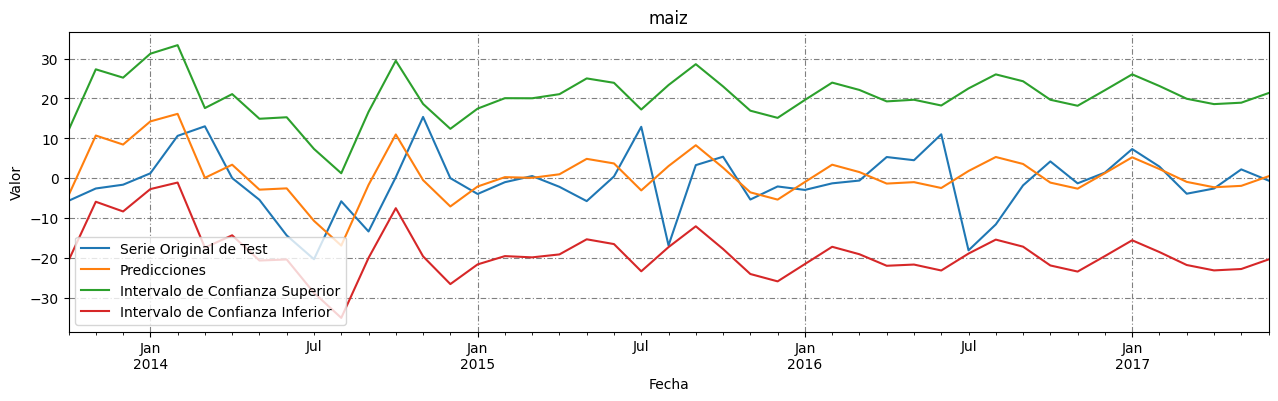

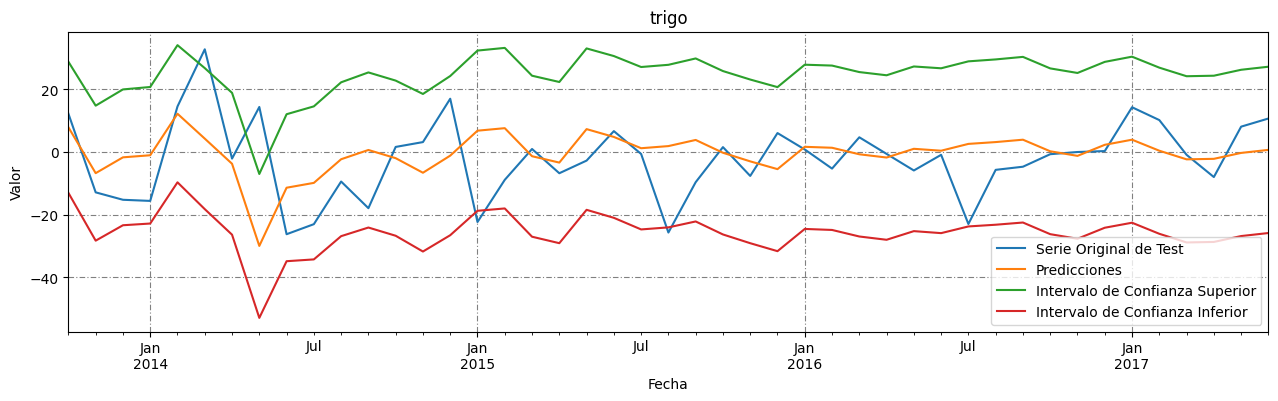

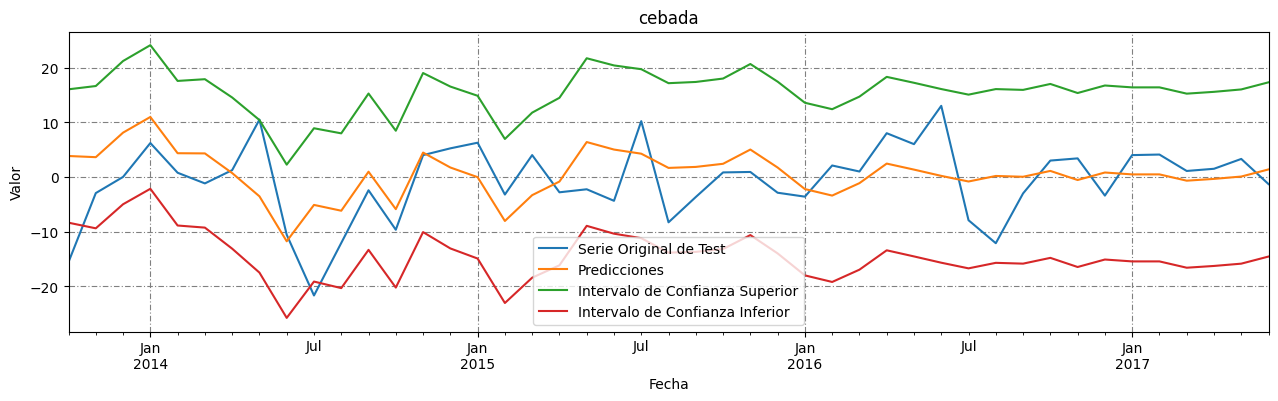

In [ ]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 45
lag_orden = 18

predicciones = model_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3]:
    df.append(serializar(predicciones, test, i, futuro))

for i, serie in enumerate(serieVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

In [ ]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [ ]:
def test_residuos(residuos):


    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')

    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

In [ ]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

In [ ]:
futuro

45

In [ ]:
test.cebada[:futuro]

,cebada
indice_tiempo,
2013-10-01,-15.540935
2013-11-01,-2.940254
2013-12-01,0.012924
2014-01-01,6.202309
2014-02-01,0.774812
2014-03-01,-1.172298
2014-04-01,1.251631
2014-05-01,10.480296
2014-06-01,-10.550880


In [ ]:
test

,maiz,trigo,cebada
indice_tiempo,,,
2013-10-01,-5.680207,12.243653,-15.540935
2013-11-01,-2.590485,-12.890210,-2.940254
2013-12-01,-1.638616,-15.261064,0.012924
2014-01-01,1.218540,-15.621904,6.202309
2014-02-01,10.609191,14.547073,0.774812
2014-03-01,13.007051,32.810225,-1.172298
2014-04-01,0.028120,-2.105802,1.251631
2014-05-01,-5.436563,14.386060,10.480296
2014-06-01,-14.364711,-26.263848,-10.550880


maiz
-----------------------------
MSE: 77.02526499337338
MAE: 6.750630914304971
RMSE: 8.776403875926254
MAPE: 62.4744
Evaluacion de residuos de Serie 


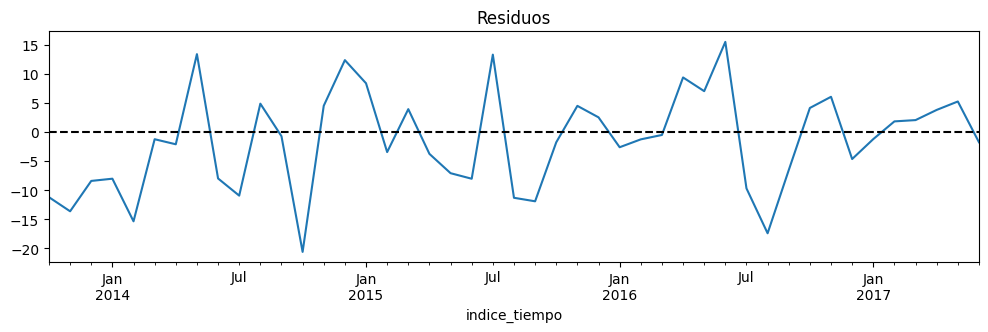

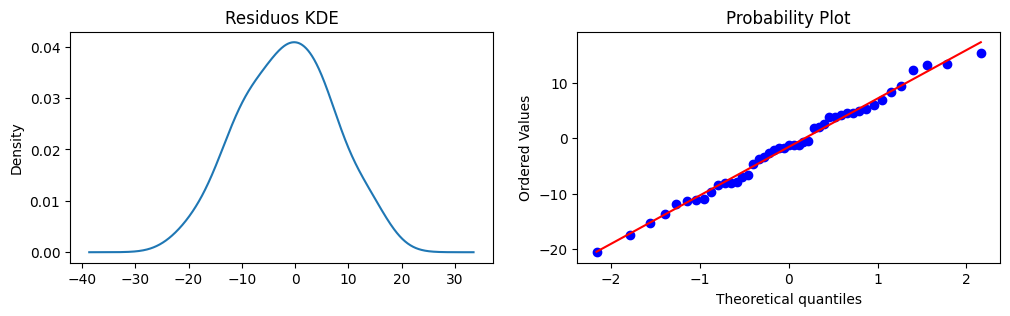

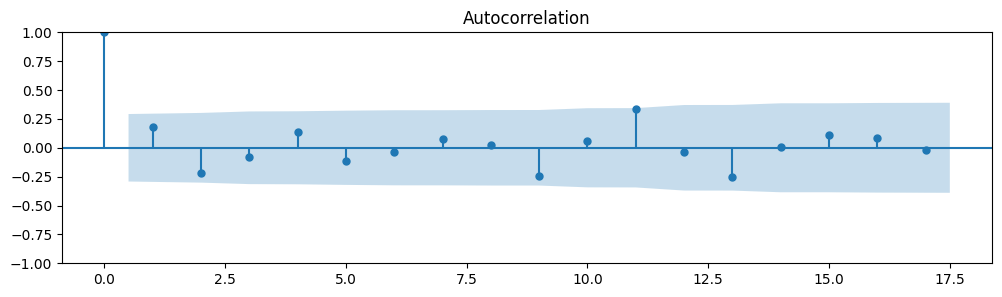

Descriptivo Residuos

count    45.000000
mean     -1.578524
std       8.547923
min     -20.604221
25%      -8.033848
50%      -1.276123
75%       4.476611
max      15.466142
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.7471583983911969

Shapiro
p-valor: 0.8929738359117009



In [ ]:
print("maiz")
print("-----------------------------")
evaluar_metricas(test.maiz[:futuro], df[0].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[0].iloc[:,0])

Ambas pruebas indican que no hay suficiente evidencia para rechazar la hipótesis nula de que los residuos del modelo siguen una distribución normal. Esto es una señal positiva para la calidad del modelo, ya que los modelos VAR (y muchos otros modelos estadísticos) asumen que los residuos son aproximadamente normales para que las inferencias y predicciones sean válidas.

trigo
-----------------------------
MSE: 156.00836544895324
MAE: 9.419628668845146
RMSE: 12.490330878281537
MAPE: inf
Evaluacion de residuos de Serie 


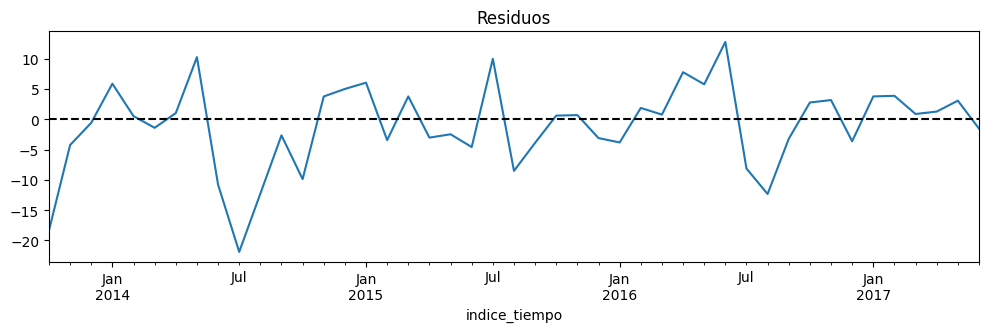

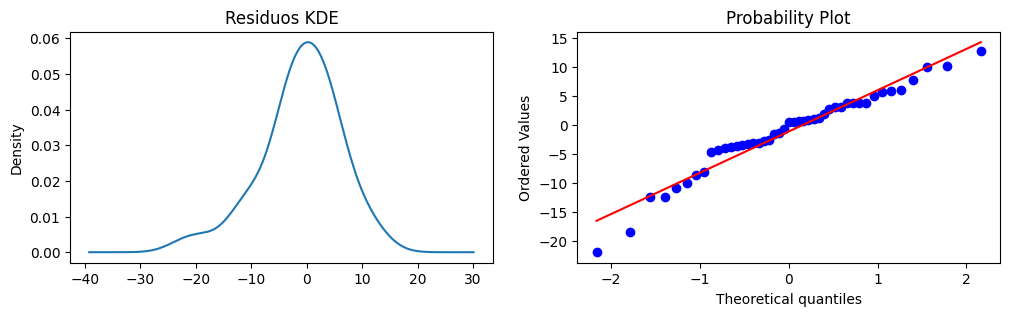

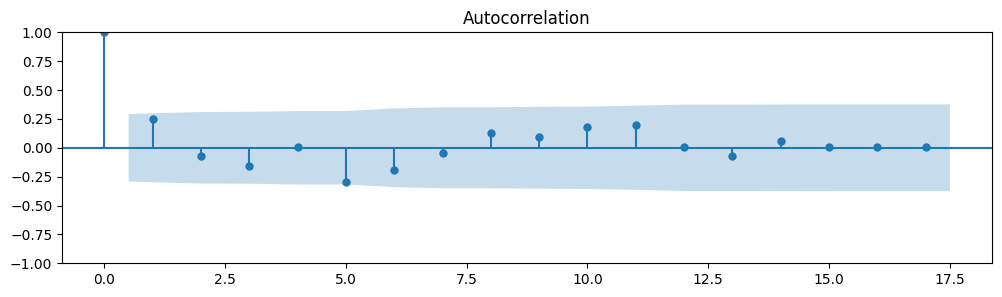

Descriptivo Residuos

count    45.000000
mean     -1.080562
std       7.086515
min     -21.883788
25%      -3.825810
50%       0.515704
75%       3.760648
max      12.767770
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.06972414755165653

Shapiro
p-valor: 0.10223412683063293



In [ ]:
print("trigo")
print("-----------------------------")
evaluar_metricas(test.trigo[:futuro], df[1].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

cebada
-----------------------------
MSE: 44.3792782531735
MAE: 5.046092123244511
RMSE: 6.661777409458643
MAPE: 1.0287
Evaluacion de residuos de Serie 


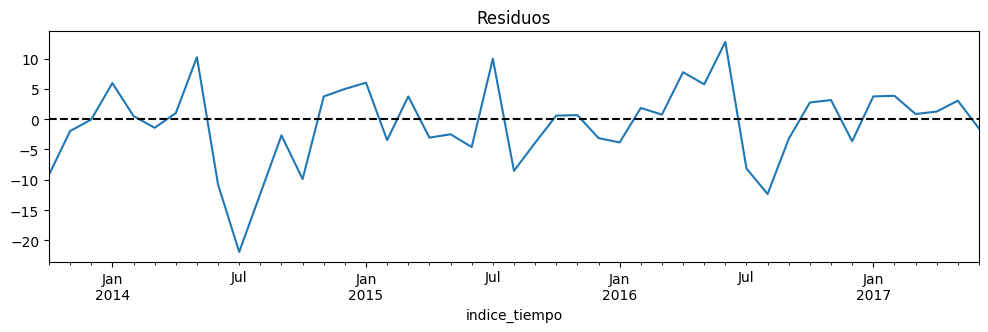

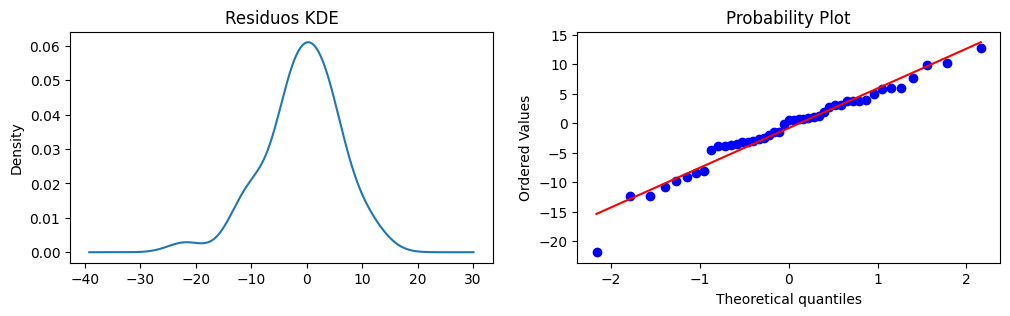

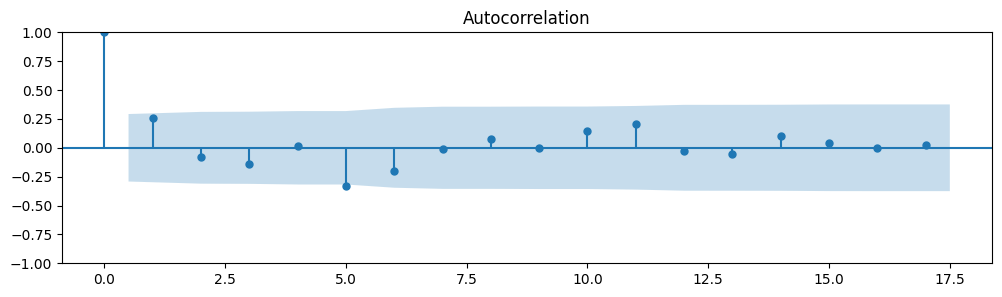

Descriptivo Residuos

count    45.000000
mean     -0.823483
std       6.685384
min     -21.896846
25%      -3.645242
50%       0.519514
75%       3.747636
max      12.754758
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.094847818055345

Shapiro
p-valor: 0.21260859523529652



In [ ]:
print("cebada")
print("-----------------------------")

evaluar_metricas(test.cebada[:futuro], df[2].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[2].iloc[:,0])

**Analizamos los Impulsos respuesta:**  

Cómo las variables en el modelo responden a un shock o perturbación en una de las variables.

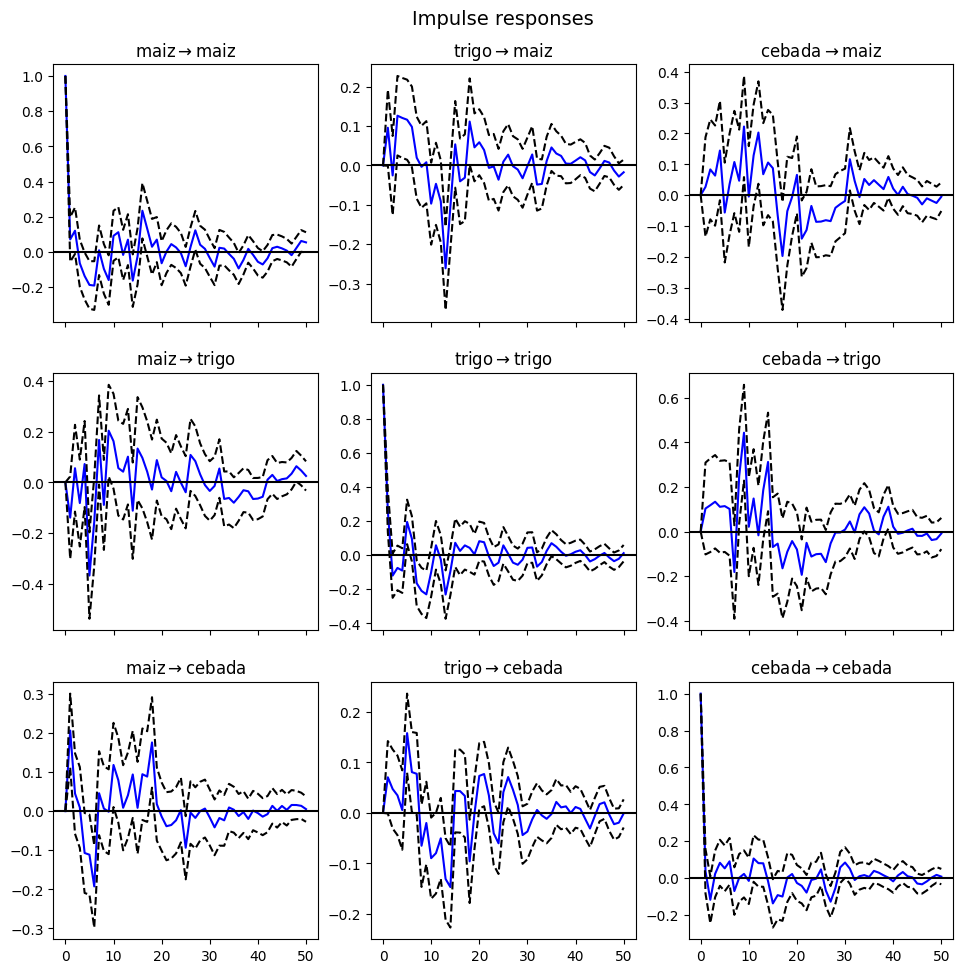

In [ ]:
model_fitted.irf(50).plot();